In [71]:
from pyquil import Program, get_qc
from pyquil.gates import MEASURE, X, H, Z

# Prove with Measurement Basis (Computational Basis)

In [72]:
# Create a program that measures a qubit
program = Program()
readout = program.declare('readout', 'BIT', 4)
qubit = [0, 1, 2, 3]

# qubit 0 is in the |0> state for testing with X gate
# qubit 1 is in the |1> state for testing with X gate
# qubit 2 is in the |0> state for testing with HZH gate
# qubit 3 is in the |1> state for testing with HZH gate
program += X(qubit[1]) # Set qubit 1 to |1>
program += X(qubit[3]) # Set qubit 3 to |1>

# Measure the qubits
for i in range(4):
    program += MEASURE(qubit[i], readout[i])

# Run the program on a QVM
qc = get_qc('4q-qvm')
executable = qc.compile(program)
result = qc.run(executable)
status = enumerate(result.get_register_map().get('readout')[0])
print(*[f'qubit {i} : |{q}>' for i, q in status], sep='\n')

qubit 0 : |0>
qubit 1 : |1>
qubit 2 : |0>
qubit 3 : |1>


In [73]:
def X_gate(program, qubit):
    program += X(qubit)

def HZH_gate(program, qubit):
    program += H(qubit) 
    program += Z(qubit) 
    program += H(qubit)

In [74]:
# Apply the X gate to the qubit[0] & qubit[1] 
# and the HZH gate to the qubit[2] & qubit[3] 
X_gate(program, qubit[0])
X_gate(program, qubit[1])
HZH_gate(program, qubit[2])
HZH_gate(program, qubit[3])

# Measure the qubits
for i in range(4):
    program += MEASURE(qubit[i], readout[i])

# Test for 1000 shots
program.wrap_in_numshots_loop(1000)

# Run the program on a QVM
executable = qc.compile(program)
result = qc.run(executable)
status = enumerate(result.get_register_map().get('readout')[0])
print(*[f'qubit {i} : |{q}>' for i, q in status], sep='\n')

qubit 0 : |1>
qubit 1 : |0>
qubit 2 : |1>
qubit 3 : |0>


qubit 0 : |0> count = 0, |1> count = 1000


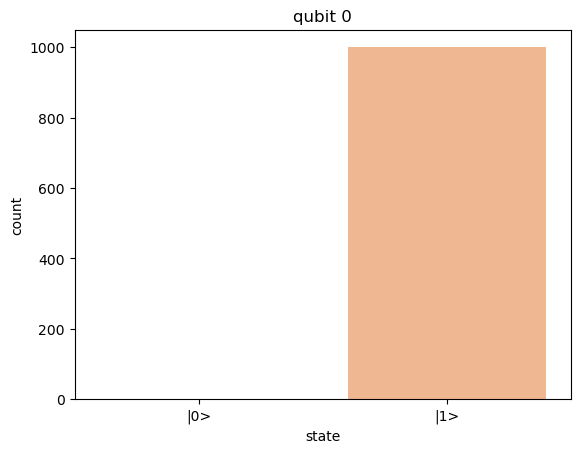

qubit 1 : |0> count = 1000, |1> count = 0


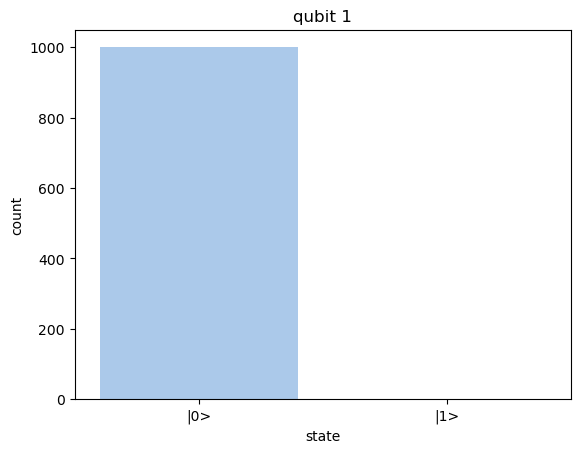

qubit 2 : |0> count = 0, |1> count = 1000


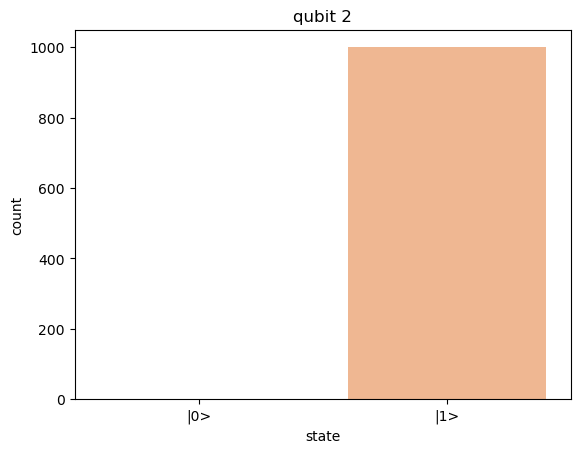

qubit 3 : |0> count = 1000, |1> count = 0


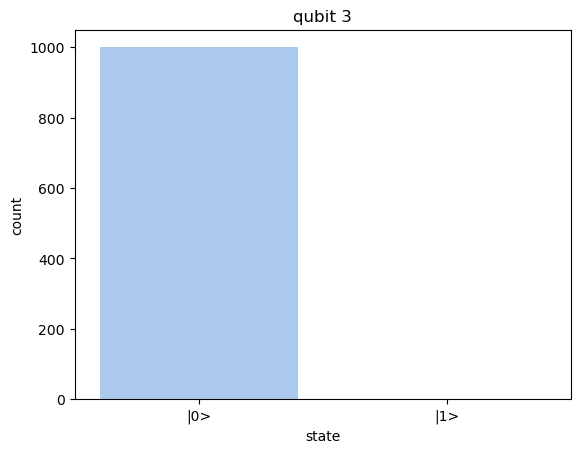

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
output = result.get_register_map().get('readout').T

# Count the number of |0> and |1> states for each qubit
for i in range(4):
    print(f'qubit {i} : |0> count = {np.count_nonzero(output[i] == 0)}, |1> count = {np.count_nonzero(output[i] == 1)}')

    # Create a dataframe to display the results
    df = pd.DataFrame({'state': ['|0>', '|1>'], 'count': [np.count_nonzero(output[i] == 0), np.count_nonzero(output[i] == 1)]})
    sns.barplot(x='state', y='count', data=df, palette='pastel', hue='state')
    plt.title(f'qubit {i}')
    plt.show()


# What Wave Function Simulator Can Do ?

In [76]:
from pyquil.api import WavefunctionSimulator

# Use the WavefunctionSimulator to get the wavefunction
wavefunction_simulator = WavefunctionSimulator()
wavefunction_X0 = wavefunction_simulator.wavefunction(Program(X(0)))
wavefunction_X1 = wavefunction_simulator.wavefunction(Program(X(0), X(0)))
wavefunction_HZH2 = wavefunction_simulator.wavefunction(Program(H(0), Z(0), H(0)))
wavefunction_HZH3 = wavefunction_simulator.wavefunction(Program(X(0), H(0), Z(0), H(0)))
print(wavefunction_X0)
print(wavefunction_X1)
print(wavefunction_HZH2)
print(wavefunction_HZH3)


(1+0j)|1>
(1+0j)|0>
(1+0j)|1>
(1+0j)|0>
